In [37]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sbn
sbn.set()
import math
import scipy.stats as stats


In [6]:
#m = .97
#b = 1.96


In [7]:
pizza_diams = np.array([6,8,10,14,18])
pizza_price = np.array([7,9,13,17.5,18])


In [8]:
#The variance is a measure of how much a set of values a spred out
sum_diam = 0 
for x in pizza_diams:
    sum_diam += x
mean_diam = sum_diam/(len(pizza_diams))   
sum_price = 0 
for y in pizza_price:
    sum_price += y
mean_price = sum_price/(len(pizza_price)) 
#print(mean_diam) #11.2
#mean_price #12.9
sum_var = 0
for x in pizza_diams:
    dif = (x - mean_diam)**2
    sum_var += dif
var = sum_var/(len(pizza_diams)-1)
var #23.199999


23.199999999999999

In [9]:
#covariance
top = 0

for i in range(len(pizza_diams)):
    mul = (pizza_diams[i] - mean_diam)*(pizza_price[i] - mean_price)
    top += mul
            
cov = top/(len(pizza_diams)-1)
#cov #22.659999
m = cov/var
m

0.9762931034482758

In [10]:
b = mean_price - m*mean_diam
b

1.9655172413793114

/usr/local/lib/python3.4/dist-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


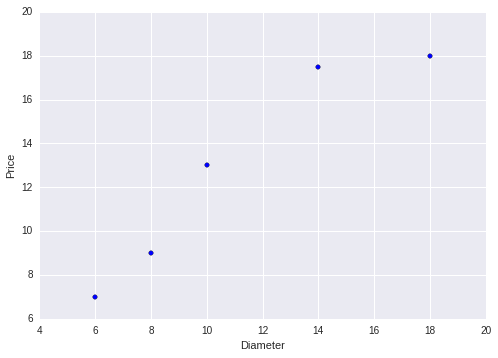

In [12]:
plt.scatter(pizza_diams, pizza_price)
plt.xlabel('Diameter')
plt.ylabel('Price')


/usr/local/lib/python3.4/dist-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


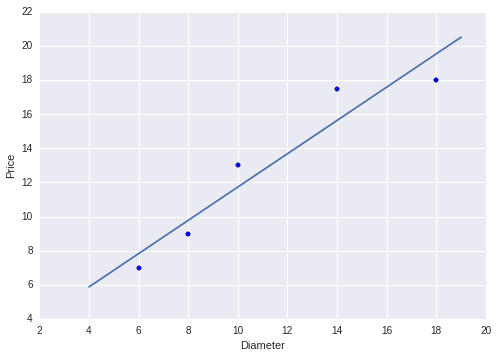

In [15]:
xvals = np.arange(4,20,1)
pizza_diams = np.array([6,8,10,14,18])
pizza_price = np.array([7,9,13,17.5,18])
plt.scatter(pizza_diams, pizza_price)
plt.plot(xvals,m*xvals+b)
plt.xlabel('Diameter')
plt.ylabel('Price')

In [23]:
from sklearn.linear_model import LinearRegression
pizza_diams_m = pizza_diams.reshape(5,1)
pizza_price_m = pizza_price.reshape(5,1)
rgm = LinearRegression()
rgm.fit(pizza_diams_m,pizza_price_m)
print(rgm.coef_,rgm.intercept_)
print(pizza_diams_m)

[[ 0.9762931]] [ 1.96551724]
[[ 6]
 [ 8]
 [10]
 [14]
 [18]]


In [24]:
pvals = rgm.predict([[i] for i in range(1,21)])
pvals

array([[  2.94181034],
       [  3.91810345],
       [  4.89439655],
       [  5.87068966],
       [  6.84698276],
       [  7.82327586],
       [  8.79956897],
       [  9.77586207],
       [ 10.75215517],
       [ 11.72844828],
       [ 12.70474138],
       [ 13.68103448],
       [ 14.65732759],
       [ 15.63362069],
       [ 16.60991379],
       [ 17.5862069 ],
       [ 18.5625    ],
       [ 19.5387931 ],
       [ 20.51508621],
       [ 21.49137931]])

/usr/local/lib/python3.4/dist-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


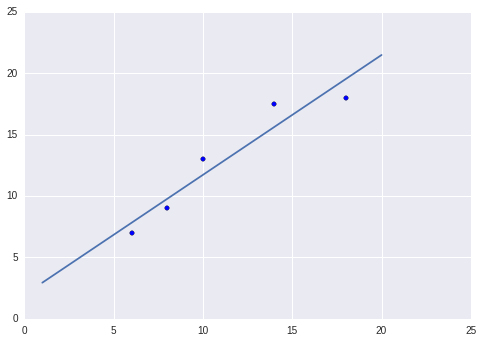

In [25]:
plt.scatter(pizza_diams, pizza_price)
plt.plot([i for i in range(1,21)], pvals.ravel())#ravel makes the array in 1D

In [28]:
rgm.score(pizza_diams_m, pizza_price_m)
X_test = np.array([8,9,11,16,12]).reshape(5,1)
Y_test = np.array([11,8.5,15,18,11]).reshape(5,1)
rgm.score(X_test,Y_test)#Returns the coefficient of determination R^2 of the prediction.

0.6620052929422553

In [32]:
#Linear regression generalizes to multiple dimensions
#Suppose we add the number of toppings to the model
pizza_features = np.array([[6,2],[8,1],[10,0],[14,2],[18,0]])
trgm = LinearRegression()
trgm.fit(pizza_features,pizza_price_m)



LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [34]:
#pizza_price = np.array([7,9,13,17.5,18])
tpvals = trgm.predict(pizza_features)
tpvals

array([[  8.04166667],
       [  9.66666667],
       [ 11.29166667],
       [ 16.125     ],
       [ 19.375     ]])

In [35]:
tX_test = np.array([[8,2],[9,0],[11,2],[16,2],[12,0]])
trgm.score(tX_test, Y_test)

0.77016777313184681

In [38]:
#boston datasets in higher dimesions
from sklearn.datasets import load_boston
boston = load_boston()

In [39]:
boston.keys()

dict_keys(['DESCR', 'target', 'feature_names', 'data'])

In [40]:
boston.data.shape

(506, 13)

In [42]:
print (boston.feature_names)

['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


In [43]:
print(boston.DESCR)

Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
      

In [44]:
bos = pd.DataFrame(boston.data)
bos.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.00632,18,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98
1,0.02731,0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14
2,0.02729,0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03
3,0.03237,0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94
4,0.06905,0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33


In [46]:
bos.columns = boston.feature_names
bos.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98
1,0.02731,0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14
2,0.02729,0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03
3,0.03237,0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94
4,0.06905,0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33


In [47]:
#boston.target conrains the housing prices
boston.target[:5]

array([ 24. ,  21.6,  34.7,  33.4,  36.2])

In [49]:
bos['PRICE'] = boston.target
bos.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [62]:
#fit a linear regression model and predict the Boston
#housing prices. Using the least squares method as the way
#to estimate the coefficients
#Y = boston housing price
#X = all the other features(or independent variables)
from sklearn.linear_model import LinearRegression
X = bos.drop('PRICE', axis = 1)
lm = LinearRegression()
lm

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [63]:
lm.fit(X,bos.PRICE)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [53]:
print("Estimated intercept coefficient: ", lm.intercept_)#y intercept

Estimated intercept coefficient:  36.4911032804


In [55]:
print("Number of coefficients: ", len(lm.coef_))#slope

Number of coefficients:  13


In [67]:
#DataFrame that contains features and estimated coefficients
#pd.DataFrame(zip(X.columns,lm.coef_),columns = ['features','estimatedCoefficients'])

In [71]:
df = pd.DataFrame()
df['features'] = X.columns
df['estimatedCoefficients'] = lm.coef_
df

,features,estimatedCoefficients
0,CRIM,-0.107171
1,ZN,0.046395
2,INDUS,0.020860
3,CHAS,2.688561
4,NOX,-17.795759
5,RM,3.804752
6,AGE,0.000751
7,DIS,-1.475759
8,RAD,0.305655
9,TAX,-0.012329


/usr/local/lib/python3.4/dist-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


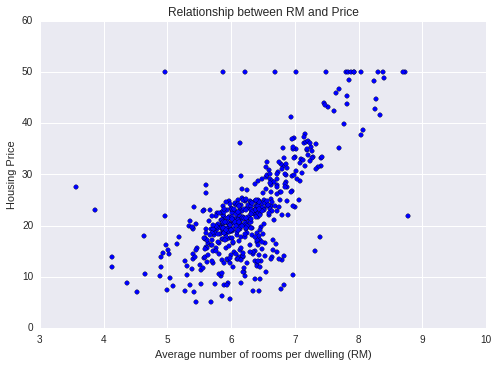

In [74]:
plt.scatter(bos.RM, bos.PRICE)
plt.xlabel("Average number of rooms per dwelling (RM)")
plt.ylabel("Housing Price")
plt.title("Relationship between RM and Price")
plt.show()

In [75]:
#positive correlation between RM and hosuing prices
#predicting prices
lm.predict(X)[:5]

array([ 30.00821269,  25.0298606 ,  30.5702317 ,  28.60814055,  27.94288232])

/usr/local/lib/python3.4/dist-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


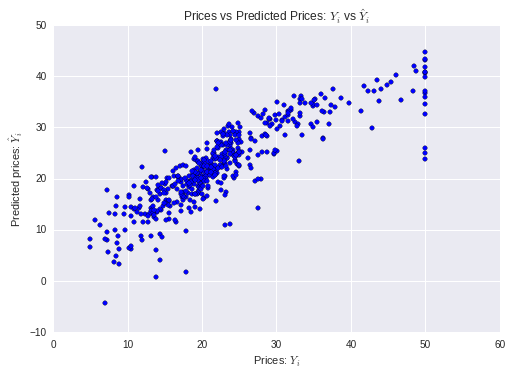

In [76]:
plt.scatter(bos.PRICE,lm.predict(X))
plt.xlabel("Prices: $Y_i$")
plt.ylabel("Predicted prices: $\hat{Y}_i$")
plt.title("Prices vs Predicted Prices: $Y_i$ vs $\hat{Y}_i$")

In [77]:
#there is some error in the prediction
#calculating using mean squared error
mseFull = np.mean((bos.PRICE - lm.predict(X))**2)
print("Mean Squared Error: ", mseFull)

Mean Squared Error:  21.8977792177


In [78]:
#if fitted in linear regression for one fature the error will 
#be very high
lm.fit(X[['PTRATIO']], bos.PRICE)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [80]:
msePTRATIO = np.mean((bos.PRICE - lm.predict(X[['PTRATIO']]))**2)
msePTRATIO


62.652200013769267

In [81]:
#Training and validating Data sets
from sklearn.cross_validation import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, bos.PRICE, test_size = .33, random_state = 5)

In [83]:
print(X_train.shape)#.67
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(339, 13)
(167, 13)
(339,)
(167,)


In [89]:
#using linear regression model using train test dataset
lm = LinearRegression()
lm.fit(X_train, Y_train)
pred_train = lm.predict(X_train)
pred_test = lm.predict(X_test)
#print("pred_train: ", pred_train)
#print("pred_test: ", pred_test)

In [92]:
#Calculating the mean squared error for training and test data
print("Fit a models X_train, and calculate MSE with Y_train:", np.mean((Y_train - lm.predict(X_train))**2))

Fit a models X_train, and calculate MSE with Y_train: 19.5467584735


In [93]:
#Calculating the mean squared error for training and test data
print("Fit a models X_train, and calculate MSE with Y_train:", np.mean((Y_test - lm.predict(X_test))**2))

Fit a models X_train, and calculate MSE with Y_train: 28.5413672756


/usr/local/lib/python3.4/dist-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


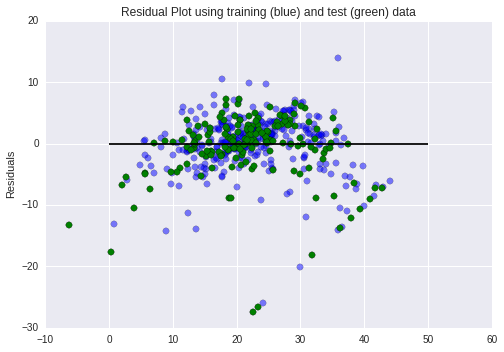

In [95]:
#Residual errors are good way to visualize error in data. 
#If done a good job your data should be randomly scattered
#around line zero
plt.scatter(lm.predict(X_train),lm.predict(X_train)-Y_train, c = 'b', s = 40, alpha = 0.5)
plt.scatter(lm.predict(X_test),lm.predict(X_test)-Y_test, c = 'g', s = 40)
plt.hlines(y = 0, xmin = 0, xmax = 50)
plt.title('Residual Plot using training (blue) and test (green) data')
plt.ylabel('Residuals')